In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Housing.csv')

# Select the target variable
target = df['price']

# Select the features (excluding the target variable and non-numeric columns for now)
# We'll select only numerical features initially for simplicity in this step
features = df.select_dtypes(include=['int64', 'float64']).drop('price', axis=1)

# Check for missing values
print("Missing values in features:")
print(features.isnull().sum())

print("\nMissing values in target:")
print(target.isnull().sum())

# Since there are no missing values, no imputation or dropping is needed at this stage.
# We will handle feature scaling in the next step if necessary.

Missing values in features:
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64

Missing values in target:
0


**Reasoning**:
Since there are no missing values, the next step is to consider feature scaling for the selected features as it is often beneficial for gradient descent.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
scaled_features = scaler.fit_transform(features)

# Store the scaled features in a DataFrame for clarity, keeping the original column names
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows of the scaled features
print("Scaled features:")
display(scaled_features_df.head())

Scaled features:


,area,bedrooms,bathrooms,stories,parking
0,1.046726,1.403419,1.421812,1.378217,1.517692
1,1.757010,1.403419,5.405809,2.532024,2.679409
2,2.218232,0.047278,1.421812,0.224410,1.517692
3,1.083624,1.403419,1.421812,0.224410,2.679409
4,1.046726,1.403419,-0.570187,0.224410,1.517692


In [ ]:
import numpy as np

def gradient_descent(X, y, params, learning_rate, n_iterations):
    """
    Implements the gradient descent algorithm for linear regression.

    Args:
        X (pd.DataFrame or np.ndarray): Feature data.
        y (pd.Series or np.ndarray): Target variable.
        params (dict): Initial parameters with 'weights' (np.ndarray) and 'bias' (float).
        learning_rate (float): The learning rate for gradient descent.
        n_iterations (int): The number of iterations.

    Returns:
        tuple: A tuple containing:
            - np.ndarray: Optimized weights.
            - float: Optimized bias.
            - list: History of the cost function at each iteration.
    """
    cost_history = []
    weights = params['weights']
    bias = params['bias']
    m = len(y)  # Number of data points

    for i in range(n_iterations):
        # Calculate predicted values
        y_pred = X @ weights + bias

        # Calculate the error
        error = y_pred - y

        # Calculate gradients
        weights_gradient = (1/m) * X.T @ error
        bias_gradient = (1/m) * np.sum(error)

        # Update parameters
        weights = weights - learning_rate * weights_gradient
        bias = bias - learning_rate * bias_gradient

        # Calculate cost (MSE)
        cost = (1/m) * np.sum(error**2)
        cost_history.append(cost)

        # Optional: Print cost every few iterations to monitor progress
        # if i % 100 == 0:
        #     print(f"Iteration {i}: Cost = {cost}")

    return weights, bias, cost_history

# The function is defined and ready to be used in the next step.

In [ ]:
import numpy as np

def mean_squared_error(y_true, y_pred, m):
  """
  Calculates the Mean Squared Error (MSE).

  Args:
    y_true (np.ndarray): The actual target values.
    y_pred (np.ndarray): The predicted target values.
    m (int): The number of data points.

  Returns:
    float: The calculated Mean Squared Error.
  """
  # Calculate the difference between true and predicted values
  error = y_true - y_pred

  # Square the differences
  squared_error = error**2

  # Calculate the mean of the squared differences
  mse = np.sum(squared_error) / m

  return mse

# The mean_squared_error function is now defined.

In [ ]:
import numpy as np

# 1. Determine the number of features
n_features = scaled_features_df.shape[1]

# 2. Initialize the weights as a NumPy array of zeros
initial_weights = np.zeros(n_features)

# 3. Initialize the bias as a single float value (zero)
initial_bias = 0.0

# 4. Store the initialized weights and bias in a dictionary
initial_params = {
    'weights': initial_weights,
    'bias': initial_bias
}

# 5. Set the learning rate
learning_rate = 0.01

# 6. Set the number of iterations
n_iterations = 1000

print("Initial Parameters:")
print(initial_params)
print(f"\nLearning Rate: {learning_rate}")
print(f"Number of Iterations: {n_iterations}")

Initial Parameters:
{'weights': array([0., 0., 0., 0., 0.]), 'bias': 0.0}

Learning Rate: 0.01
Number of Iterations: 1000


In [ ]:
# Run the gradient descent algorithm
optimized_weights, optimized_bias, cost_history = gradient_descent(
    scaled_features_df,
    target,
    initial_params,
    learning_rate,
    n_iterations
)

# Print a message indicating that the gradient descent process is complete
print("Gradient descent process complete.")

# Optional: Print the optimized parameters and the final cost
print("\nOptimized Parameters:")
print(f"Weights: {optimized_weights}")
print(f"Bias: {optimized_bias}")
print(f"\nFinal Cost (MSE): {cost_history[-1]}")

Gradient descent process complete.

Optimized Parameters:
Weights: area         717630.630740
bedrooms     124531.962534
bathrooms    568872.765927
stories      474382.249428
parking      325229.758741
dtype: float64
Bias: 4766523.46205873

Final Cost (MSE): 1531009255980.018


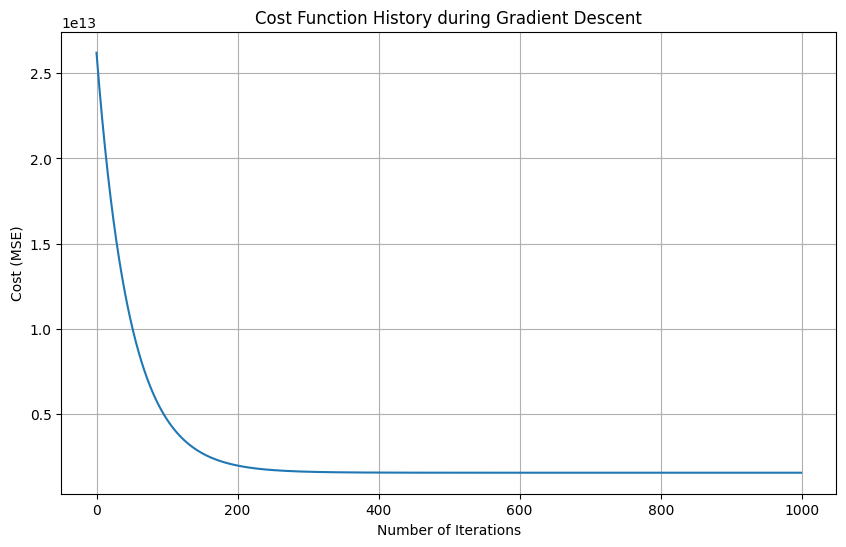


Mean Squared Error (MSE) on the dataset: 1531009247406.9265


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1. Plot the cost function history
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history)
plt.title("Cost Function History during Gradient Descent")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

# 2. Calculate predicted values using optimized parameters
y_pred = scaled_features_df @ optimized_weights + optimized_bias

# 3. Calculate the Mean Squared Error
mse = mean_squared_error(target, y_pred)

# 4. Print the calculated MSE
print(f"\nMean Squared Error (MSE) on the dataset: {mse}")